In [12]:
import numpy as np
import bats
from bats.visualization.plotly import ScatterVisualization
import scipy.spatial.distance as distance
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(0)

In [5]:
def gen_fig_8(n, r=1.0, sigma=0.1):
    X = np.random.randn(n,2)
    X = r * X / np.linalg.norm(X, axis=1).reshape(-1,1)
    X += sigma*np.random.randn(n, 2) + np.random.choice([-1/np.sqrt(2),1/np.sqrt(2)], size=(n,1))
    return X

n = 200
X = gen_fig_8(n)

fig = px.scatter(x = X[:,0], y=X[:,1], width=600, height=600)
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.write_image("images/08/sample_0.pdf")
fig.show()

In [7]:
D = distance.squareform(distance.pdist(X))
r = bats.enclosing_radius(bats.Matrix(D))
print("enclosing radius = {}".format(r))

enclosing radius = 2.157893754329096


In [9]:
F = bats.RipsFiltration(bats.Matrix(D), r, 2)
RF = bats.reduce(F, bats.F2())

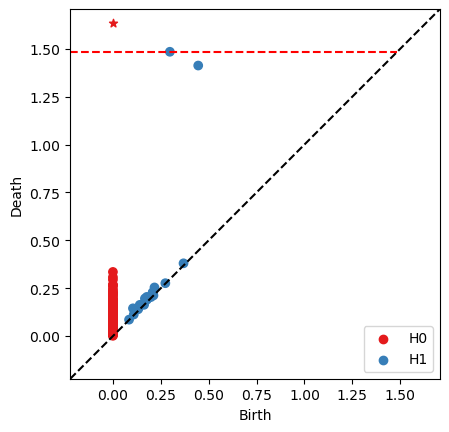

In [14]:
ps = RF.persistence_pairs(0) + RF.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

Now, let's do the same thing again with a different random seed

In [15]:
np.random.seed(42)

def gen_fig_8(n, r=1.0, sigma=0.1):
    X = np.random.randn(n,2)
    X = r * X / np.linalg.norm(X, axis=1).reshape(-1,1)
    X += sigma*np.random.randn(n, 2) + np.random.choice([-1/np.sqrt(2),1/np.sqrt(2)], size=(n,1))
    return X

n = 200
X = gen_fig_8(n)

fig = px.scatter(x = X[:,0], y=X[:,1], width=600, height=600)
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.write_image("images/08/sample_42.pdf")
fig.show()

In [16]:
D = distance.squareform(distance.pdist(X))
r = bats.enclosing_radius(bats.Matrix(D))
print("enclosing radius = {}".format(r))

enclosing radius = 2.0688679890761104


In [22]:
F2 = bats.RipsFiltration(bats.Matrix(D), r, 2)
RF2 = bats.reduce(F2, bats.F2())

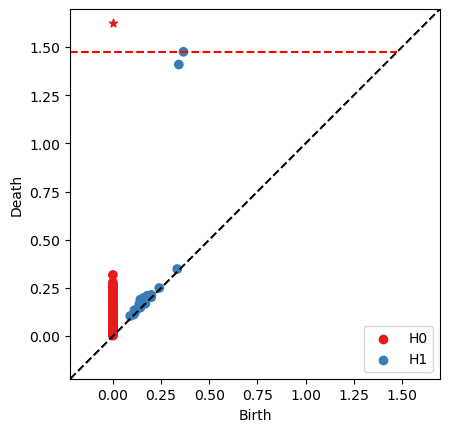

In [23]:
ps2 = RF2.persistence_pairs(0) + RF2.persistence_pairs(1)
bats.persistence_diagram(ps2)
plt.show()

Looks pretty similar to what we had before.  Let's look closer

In [25]:
print("original sample")
for p in ps:
    if p.length() > 0.5:
        print(p)
        
print("\nsecond sample")
for p in ps2:
    if p.length() > 0.5:
        print(p)

original sample
0 : (0,inf) <0,-1>
1 : (0.297251,1.48417) <950,165828>
1 : (0.445265,1.41232) <1658,145106>

second sample
0 : (0,inf) <0,-1>
1 : (0.342009,1.40937) <1226,131012>
1 : (0.365953,1.47573) <1333,148151>


Comparison with bottleneck distance.  Wrapper for Hera comes from here: https://github.com/CompTop/pyhera

In [29]:
from hera_tda import BottleneckDistance

for k in [0,1]:
    psa = [p for p in RF.persistence_pairs(k) if p.length() > 0]
    psb = [p for p in RF2.persistence_pairs(k) if p.length() > 0]
    db, inds = BottleneckDistance(psa, psb)
    print("bottleneck distance in dim {} = {}".format(k, db))

bottleneck distance in dim 0 = 0.03085769240386481
bottleneck distance in dim 1 = 0.07931181989267944


In [33]:
from hera_tda import WassersteinDistance

for k in [0,1]:
    psa = [p for p in RF.persistence_pairs(k) if p.length() > 0]
    psb = [p for p in RF2.persistence_pairs(k) if p.length() > 0]
    dw = WassersteinDistance(psa, psb, 2)
    print("2-Wasserstein distance in dim {} = {}".format(k, dw))

2-Wasserstein distance in dim 0 = 0.12009131238616946
2-Wasserstein distance in dim 1 = 0.11760937610344066


Let's compare with a circle:

In [35]:
def gen_circle(n, r=1.0, sigma=0.1):
    X = np.random.randn(n,2)
    X = r * X / np.linalg.norm(X, axis=1).reshape(-1,1)
    X += sigma*np.random.randn(n, 2)
    return X

Y = gen_circle(n)

fig = px.scatter(x = Y[:,0], y=Y[:,1], width=600, height=600)
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.write_image("images/08/sample_circ.pdf")
fig.show()

In [37]:
D = distance.squareform(distance.pdist(Y))
r = bats.enclosing_radius(bats.Matrix(D))
print("enclosing radius = {}".format(r))

enclosing radius = 1.873967204659591


In [39]:
F3 = bats.RipsFiltration(bats.Matrix(D), r, 2)
RF3 = bats.reduce(F3, bats.F2())

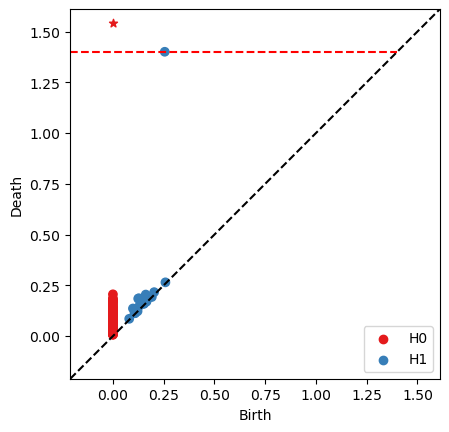

In [40]:
ps3 = RF3.persistence_pairs(0) + RF3.persistence_pairs(1)
bats.persistence_diagram(ps3)
plt.show()

In [41]:
for k in [0,1]:
    psa = [p for p in RF.persistence_pairs(k) if p.length() > 0]
    psb = [p for p in RF3.persistence_pairs(k) if p.length() > 0]
    db, inds = BottleneckDistance(psa, psb)
    print("bottleneck distance in dim {} = {}".format(k, db))

bottleneck distance in dim 0 = 0.12906894646016726
bottleneck distance in dim 1 = 0.48352922589630776


In [42]:
for k in [0,1]:
    psa = [p for p in RF.persistence_pairs(k) if p.length() > 0]
    psb = [p for p in RF3.persistence_pairs(k) if p.length() > 0]
    dw = WassersteinDistance(psa, psb, 2)
    print("2-Wasserstein distance in dim {} = {}".format(k, dw))

2-Wasserstein distance in dim 0 = 0.48097742373685054
2-Wasserstein distance in dim 1 = 0.49441362839503633
